# Table of Contents
 <p>

In [83]:
import pandas as pd
import numpy as np
from Bio import SeqIO

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14


In [60]:
Codons = {}
Letters = {}
not_codonic = 0
genes = 0
i = 0

# go through each ORF, count the A, T, G, C's in it and also
# the codons it contains:
with open("../input/clostridium_bolteae.fa", 'r') as handle:
    for record in SeqIO.parse(handle, "fasta") :
        genes += 1
        
        if len(record.seq)%3 != 0:
            not_codonic += 1
            continue
        
        for c in range(0, len(record.seq)):
            
            # count letters
            letter = str(sequence[c : c + 1])
            if letter in Letters.keys():
                Letters[letter] += 1
            else:
                Letters[letter] = 1
                
            # count codons
            if c%3 == 0:
                sequence = record.seq
                codon = str(sequence[c : c + 3])
                if codon in Codons.keys():
                    Codons[codon] += 1
                else:
                    Codons[codon] = 1

In [61]:
print('There are {0} genes in this genome, of which {1} are not consistent with a codon code'.format(genes, not_codonic))

There are 5802 genes in this genome, of which 25 are not consistent with a codon code


In [62]:
# calculate expected numbers of codons:
totalLetters = sum(Letters.values())
totalCodons = sum(Codons.values())

Exp = {}
for key in Codons.keys():
    probK = 1
    for k in key:
        probK *= Letters[k]/totalLetters
    exp_codon = probK*totalCodons
    Exp[key] = exp_codon

In [97]:
print('The GC content of this genome is: {0:.2g}'.format((Letters['G'] + Letters['C'])/totalLetters))

The GC content of this genome is: 0.5


In [79]:
# put it all into a dfs
temp1 = pd.DataFrame.from_dict(Codons, orient='index')
temp1.columns = ['Observed']

temp2 = pd.DataFrame.from_dict(Exp, orient='index')
temp2.columns = ['Expected']

In [80]:
# make a single df containing it all
df = pd.concat([temp1, temp2], axis=1)
df.reset_index(level=0, inplace=True)
df.columns = ['Codon', 'Observed', 'Expected']

In [93]:
df['Ratio'] = np.log10(df.Observed/df.Expected)
df['hue'] = df.Ratio/df.Ratio.abs()
df.sort_values('Ratio', inplace=True)

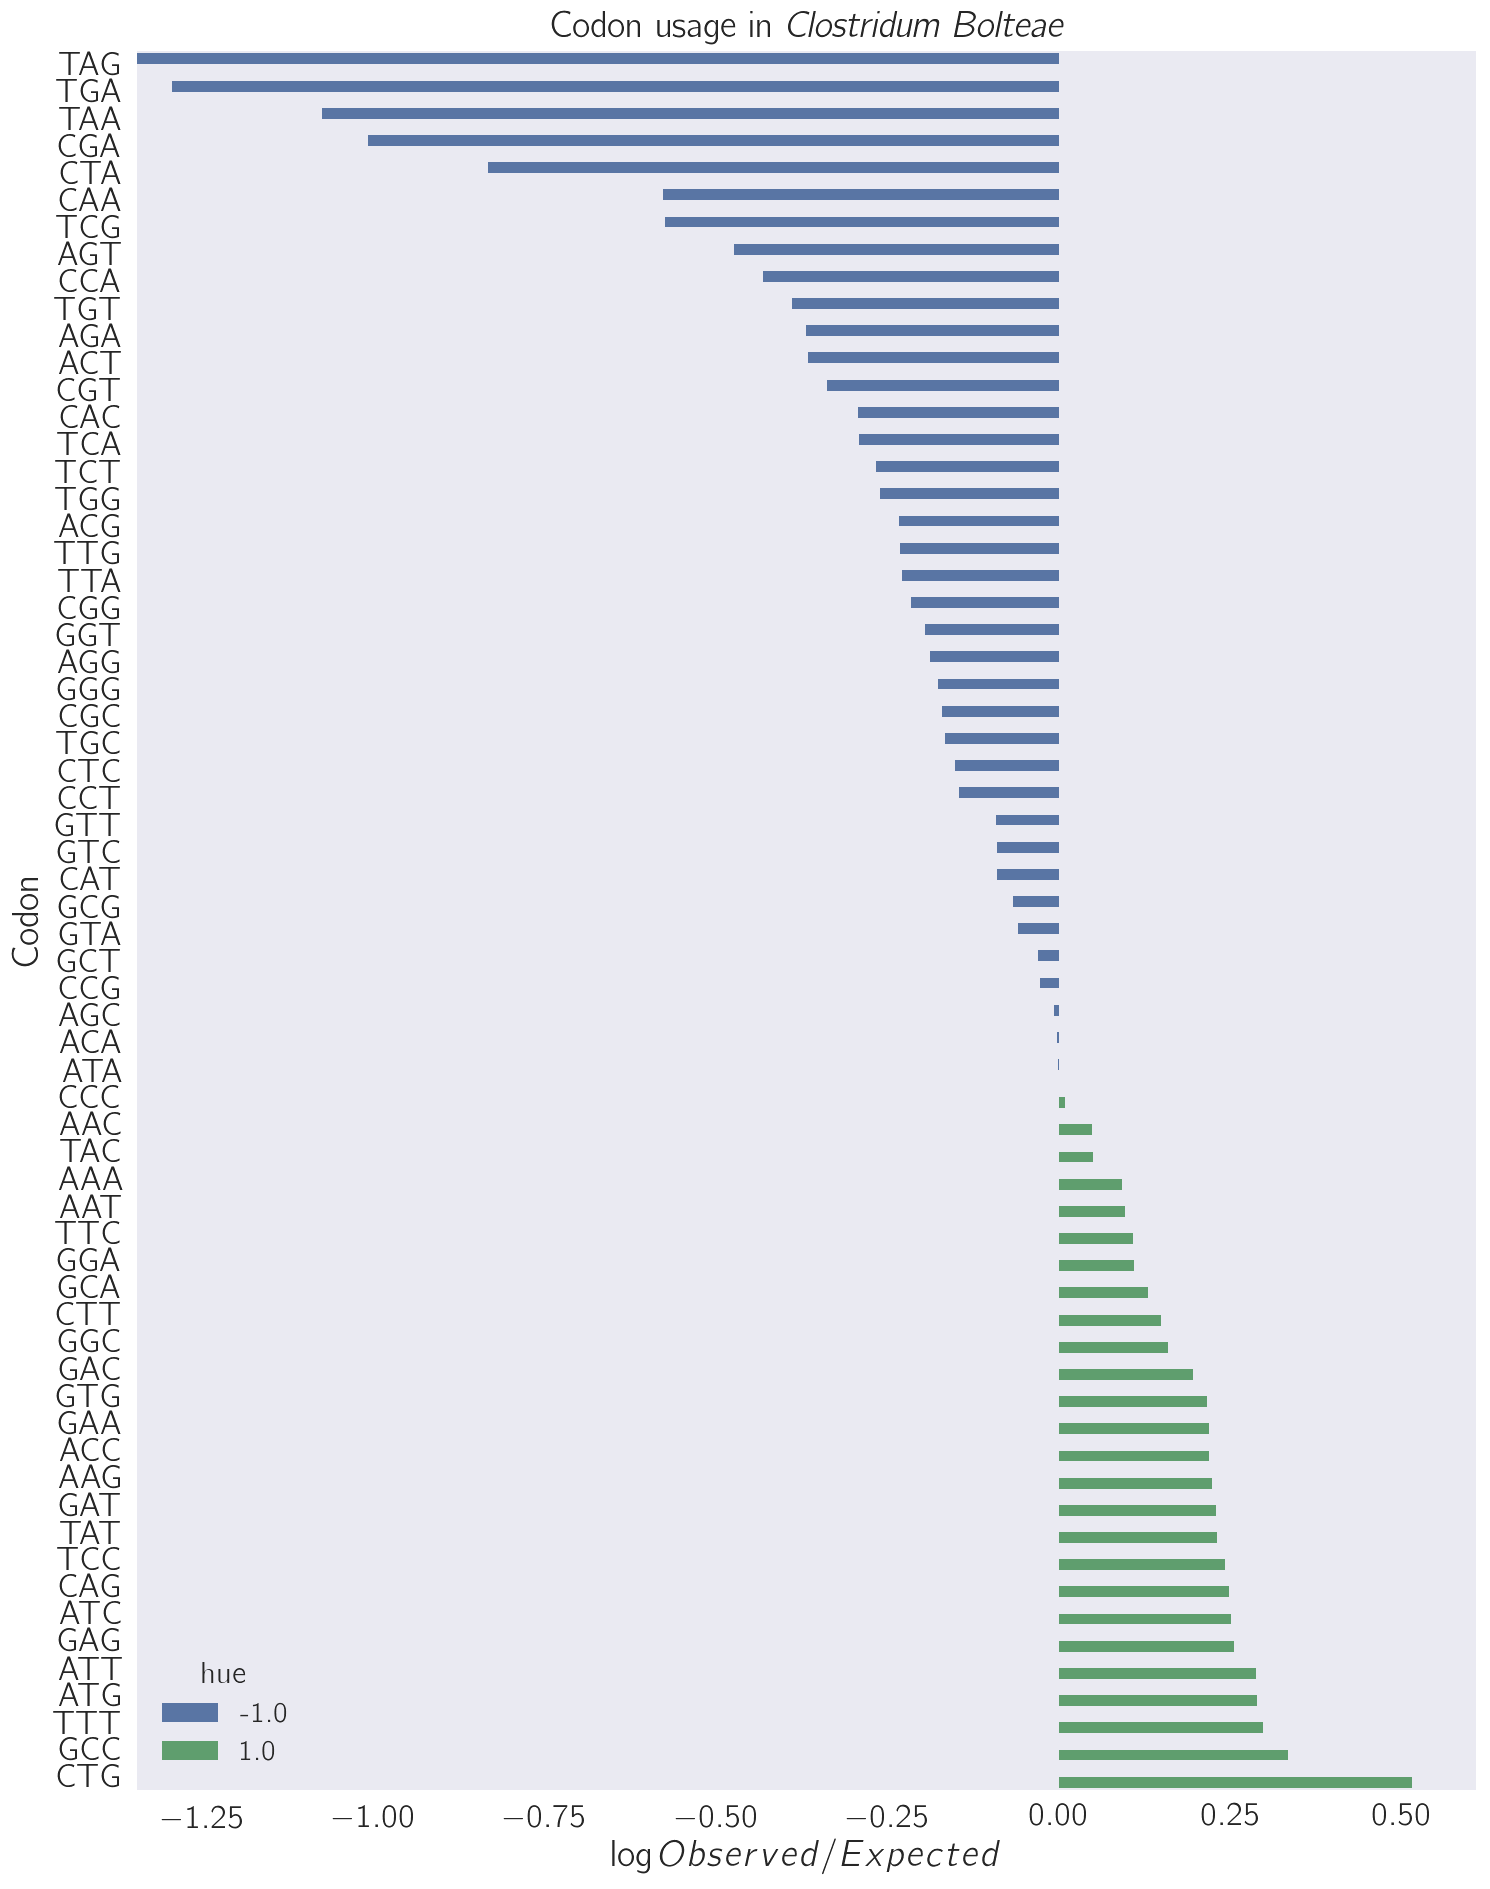

In [101]:
# pretty plot
fig, ax = plt.subplots(figsize=(12, 16))
sns.barplot(y='Codon', x='Ratio', hue='hue', data=df)
plt.title('Codon usage in \emph{Clostridum Bolteae}')
plt.xlabel('$\log{Observed/Expected}$')
plt.savefig('../output/CodonUsage.pdf', bbox_inches='tight')